## **Практическое задание №7.**
## **Применение методов машинного обучения.** 
### Лукьянов Е.А. ВМО21

Задание 1. Для выбранного и предобработанного датасета из лабораторной работы 1, учитывая особенности моделей:

Произвести классификацию используя:
1. Наивный баессовский классификатор
2. Метод k-ближайших соседей
3.  Метод опорных векторов
4. Деревья решений и случайные леса

1.1 Наивный гауссовский классификатор

Наивные байесовские классификаторы основаны на байесовских методах классификации, в основе которых лежит теорема Байеса — уравнение, описывающее 
связь условных вероятностей статистических величин. В байесовской классификации нас интересует поиск вероятности метки (категории) при определенных заданных признаках, являющихся результатами наблюдений/экспериментов величин.
 
В  наивном гауссовском классификаторе мы принимаем допущение, что правдоподобие признаковых значений х при условии, что наблюдение принадлежит классу у, подчиняется нормальному распределению.

In [3]:
import pandas as pd 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


In [4]:
# Загрузить библиотеки 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
# Загрузить данные
wine = datasets.load_wine()
features = wine.data 
target = wine.target
# Создать объект наивного гауссовского классификатора 
clf = GaussianNB()
# Натренировать модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))


[0]


В библиотеке scikit-learn мы тренируем Наивный гауссовский классификатор, используя метод fit, и, в свою очередь, можем делать предсказания 
о классе наблюдения

In [5]:
# Создать новое наблюдение 
new_observation = [[ 4, 4, 4, 0.4,4,4,4,4,0.4,0.4,4,4,4]]

Делаем предсказание о классе наблюдений

In [6]:
# Предсказать класс
model.predict(new_observation)

array([1])

In [7]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.99


In [8]:
# Создать объект наивного  гауссового классификатора с априорными вероятностями для каждого класса 
сlf = GaussianNB(priors=[0.25, 0.25, 0.5])
# Натренировать модель
model = clf.fit(features, target)
print(clf.predict(features[2:3]))

[0]


1.2 Метод k-средних
В библиотеке Scikit-Learn имеется множество алгоритмов кластеризации. Рассмотрим алгоритм кластеризации 
методом k-средних (k-means clustering), реализованный в классе sklearn.cluster.KMeans. 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # для стилизации графиков
import numpy as np

Алгоритм методв k-средних выполняет поиск заранее заданного количества кластеров в немаркированном многомерном наборе данных. 
Два допущения составляют основу модели метода k-средних.
1.  «Центр кластера» — арифметическое среднее всех точек, относящихся к этому кластеру.
2. Каждая точка ближе к центру своего кластера, чем к центрам других кластеров.
Максимизация математического ожидания (EM) 

Подход максимизации математического ожидания состоит в следующей процедуре:
1. Выдвигаем гипотезу о центрах кластеров.
2. Повторяем до достижения сходимости:
     E-шаг(шаг ожидания (expectation)): приписываем точки к ближайшим центрам кластеров;
     M-шаг(шаг максимизации (maximization)): задаем новые центры кластеров в соответствии со средними значениями.
E-шаг актуализаирует математическое ожидание того, к каким кластерам относятся точки. 
M-шаг осуществляет максимизацию некоторой целевой функции, описывающей расположения центров кластеров. В таком случае максимизация достигается путем простого усреднения данных в кластере

Cгенерируем двумерный набор данных, содержащий четыре отдельных «пятна». 

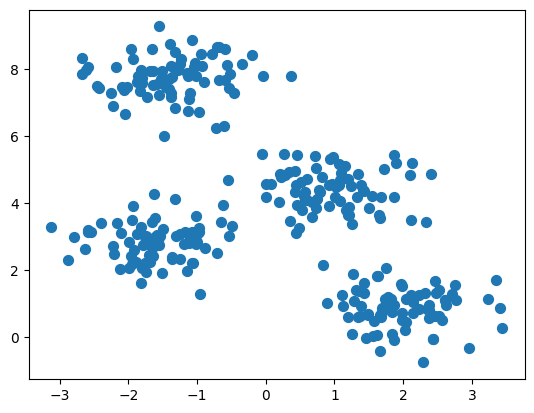

In [9]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

Реализация метода k средних используя алгоритм приведенный выше с максимизацией математического ожидания:

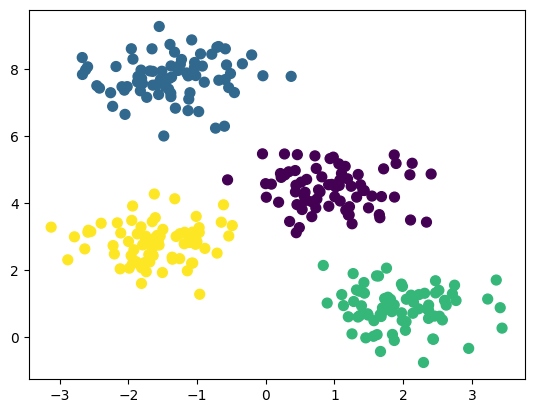

In [10]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)# 1. Выбираем кластеры случайным образом
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers) # 2a. Присваиваем метки в соответствии с ближайшим центром
        new_centers = np.array([X[labels == i].mean(0) # 2b. Находим новые центры, исходя из средних значений точек
                                      for i in range(n_clusters)]) # 2c. Проверяем сходимость
        if np.all(centers == new_centers):
             break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4) #Количество кластеров следует выбирать заранее.
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

Кластеризация немаркированных данных может быть выполнена с помощью модуля sklearn.cluster.
Метод k средних реализован в классе sklearn.cluster.KMeans
Подробнее о задании параметров https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


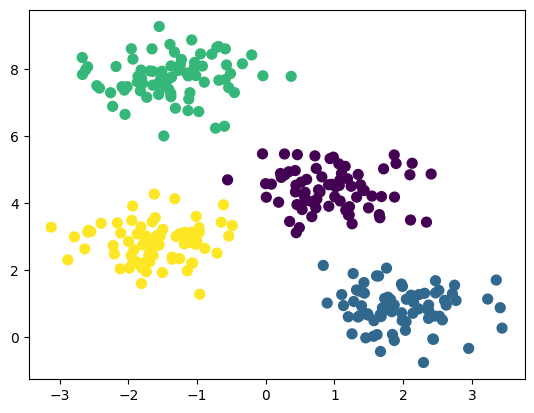

In [11]:
from sklearn.cluster import KMeans

labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

1.3  МЕТОД ОПОРНЫХ ВЕКТОРОВ
Метод опорных векторов (support vector machines, SVMs) — очень мощный и гибкий класс алгоритмов обучения с учителем как для классификации, так 
и регрессии. Рассмотрим как использовать метод опорных векторов в задачах классификации. 

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
 # Воспользуемся настройками по умолчанию библиотеки Seaborn
import seaborn as sns
sns.set()

Рассмотрим применение метода опорных векторов в задачах классификации. 

Тренировка линейного классификатора 

In [14]:
# Загрузить библиотеки
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

# Загрузить данные всего с двумя классами и двумя признаками 
iris = datasets.load_iris()
features = iris.data[:300,:2] 
target = iris.target[:300]
# Стнадартизировать признаки 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Создать опорно-векторный классификатор 
svc = LinearSVC(C=1.0)
# Натренировать модель
model = svc.fit(features_standardized, target)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Визуализация полученных результатов

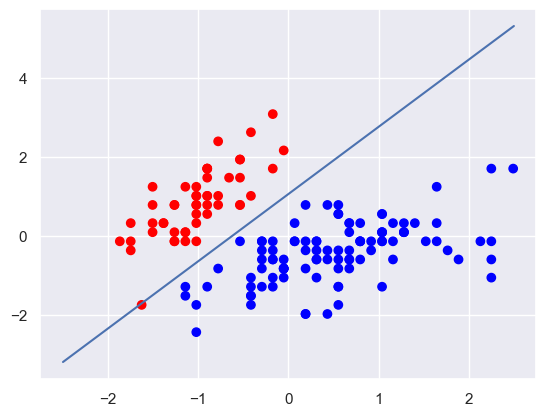

In [15]:
# Загрузить библиотеку
from matplotlib import pyplot as pit


# Вывести точки данных на график и расцветить, используя их класс 
color = ["red" if C == 0 else "blue" for C in target] 
pit.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Создать гиперплоскость 
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx-(svc.intercept_[0]) / w[1]

# Начертить гиперплоскость 
pit.plot(xx, yy)
pit. show ()

SVM-ядро
Возможности метода SVM расширяются при его комбинации с ядрами (kernels). 

Требуется натренировать опорно-векторный классификатор, но ваши классы линейно неразделимы.

In [16]:
# Загрузить библиотеки 
from sklearn.svm import SVC 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
import numpy as np
# Задать начальное значение рандомизации 
np.random.seed(0)
# Сгенерировать два признака 
features = np.random.randn(200, 2)
# Cгенерируем линейно разделимые классы
target_xor = np.logical_xor(features[:, 0] > 0 , features[:, 1] > 0 ) 
target = np.where(target_xor, 0, 1)

# Создать опорно-векторную машину  с радиально-базисным функциональным ядром (RBF-ядром) 
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор 
model = svc.fit(features, target)

Будем использовать функцию, которая выводит на график наблюдения и гиперплоскость границы решения двумерного пространства.

In [17]:
# Выведем на график наблюдения и гиперплоскость границы решения 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as pit

def plot_decision_regions(X, y, classifier): 
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), label=cl)


Рассмотрим данные, содержащие два признака (т. е. две размерности) и вектор целей с классом каждого наблюдения. 
Учтем, что классы назначены так, что они линейно неразделимы. То есть нет прямой линии, которую мы могли бы провести, чтобы разделить два класса. 

Создадим классификатор опорно-векторной машины с линейным ядром:

C:\Users\Acer\AppData\Local\Temp\ipykernel_16896\1485352998.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), label=cl)


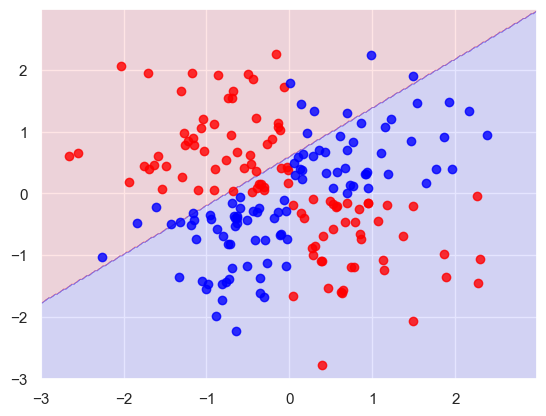

In [18]:
# Создать опорно-векторный классификатор с линейным ядром 
svc_linear = SVC(kernel="linear", random_state=0, C=1)
# Натренируем модель 
svc_linear.fit(features, target)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear', max_iter=-1, probability=False, random_state=0, shrinking=True, 
tol=0.001, verbose=False)

plot_decision_regions(features, target, classifier=svc_linear) 
pit.show()


Видно, линейная гиперплоскость очень плохо справилась с разделением двух классов
 Теперь давайте вместо линейного ядра подставим радиальнобазисное функциональное ядро и используем его для того, чтобы натренировать
новую модель

C:\Users\Acer\AppData\Local\Temp\ipykernel_16896\1485352998.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), label=cl)


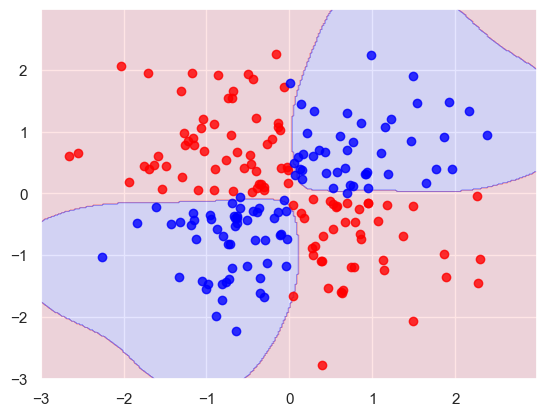

In [19]:
# Создать опорно-векторную машину с радиально-базисным функциональным ядром (RBF-ядром) 
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор 
model = svc.fit(features, target)

# Вывести на график наблюдения и гиперплоскость 
plot_decision_regions(features, target, classifier=svc) 
pit. show ()

В библиотеке scikit-leam можно выбрать требуемое ядро с помощью параметра kernel. После того как мы выберем ядро, нам нужно указать соответствующие параметры ядра, такие как значение d (используя параметр степени degree) в полиномиальных ядрах и гамма (используя параметр gamma) в радиально-базисных функциональных ядрах. Нам также нужно задать штрафной параметр С. Во время тренировки модели в большинстве случаев все они должны рассматриваться как гиперпараметры, при этом, чтобы определить комбинацию их значений, которая производит
модель с наилучшей результативностью, мы должны использовать методы отбора модели

РАЗМЫТИЕ ОТСТУПОВ
До сих пор мы рассматривали хорошо очищенных наборов данных, в которых существует идеальная граница решений. 
Что делать, если данные в некоторой степени перекрываются? 


На этот случай в реализации метода SVM есть небольшой поправочный параметр для «размытия» отступа. Данный параметр разрешает некоторым точкам «заходить» на отступ в тех случаях, когда это приводит к лучшей аппроксимации. 
Степень размытости отступа библиотеке scikit-lean контролируется с помощью гиперпараметра С — штрафа, налагаемого на ошибки. 
С — это параметр ученика SVC и штраф за ошибочное классифицирование точки данных. Когда значение С мало, классификатор получает одобрение на ошибочно классифицированные точки данных (высокое смещение, но низкую дисперсию). Когда значение С большое, классификатор сильно штрафуется за ошибочно классифицированные данные и поэтому отклоняется назад, чтобы избежать любых ошибочно классифицированных точек данных (низкое смещение, но высокая дисперсия).

Рассмотрим влияние изменения параметра C на итоговую аппроксимацию посредством размытия отступа

NameError: name 'plot_svc_decision_function' is not defined

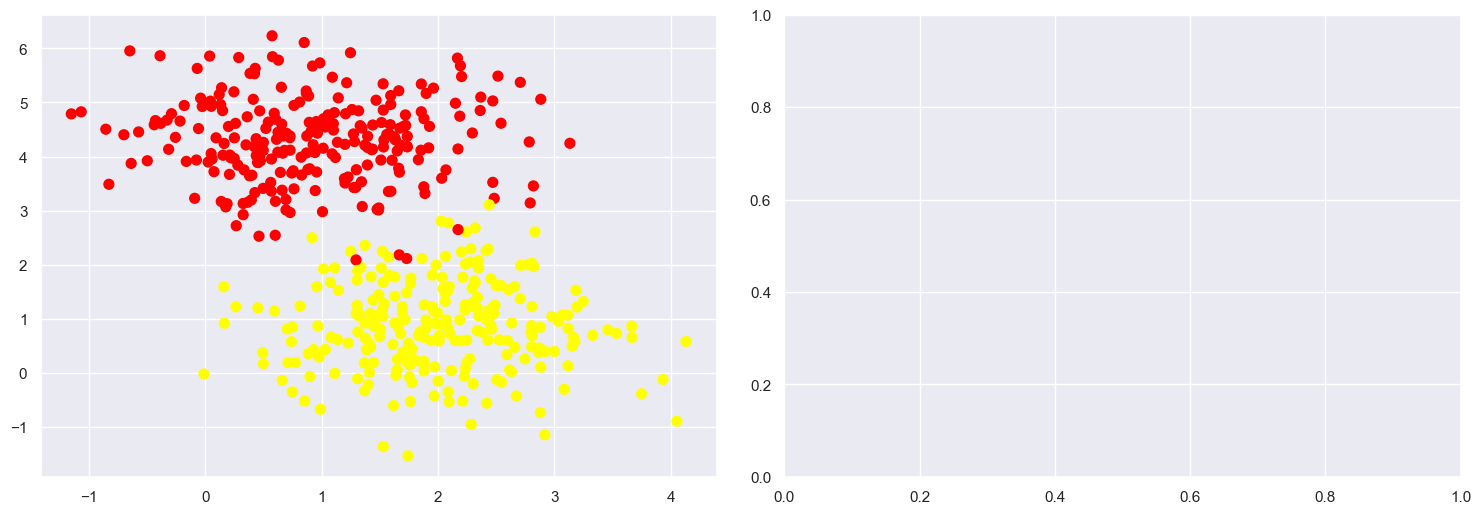

In [20]:
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)


1.4 Деревья решений и случайные леса


Деревья решений — интуитивно понятные способы классификации или маркирования объектов. По сути, все сводится к классификации путем 
задания серии уточняющих вопросов. 
Бинарное разбиение позволяет эффективно спроектировать дерево, так как каждый вопрос уменьшает количество вариантов приблизительно вдвое, 
быстро сужая возможные варианты даже при большом количестве классов. 
В связанных с машинным обучением реализациях деревьев принятия решений вопросы обычно имеют вид выровненных по осям координат разбиений данных, то есть каждый узел дерева разбивает данные на две группы с помощью порогового значения одного из признаков.

Рассмотрим следующие двумерные данные с четырьмя возможными метками классов 

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

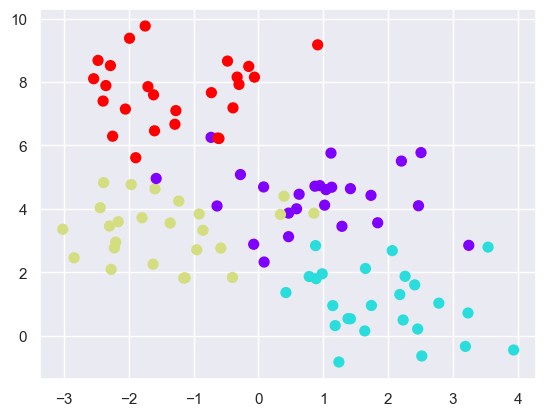

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

Простое дерево принятия решений для этих данных будет многократно разделять данные по одной или нескольким осям, в соответствии с определенным количественным критерием, и на каждом уровне маркировать новую область согласно большинству лежащих в ней точек. 
Процесс обучения дерева принятия решений на наших данных можно выполнить в Scikit-Learn с помощью оценивателя DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Функция, облегчающая визуализацию вывода классификатора

In [24]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
 ax = ax or plt.gca()
 # Рисуем обучающие точки
 ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3) 
 ax.axis('tight')
 ax.axis('off')
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()
 # Обучаем оцениватель
 model.fit(X, y)
 xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
 Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
 # Создаем цветной график с результатами
 n_classes = len(np.unique(y))
 contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)
 ax.set(xlim=xlim, ylim=ylim)

Визуализируем результаты классификации на основе дерева принятия решений из примера

C:\Users\Acer\AppData\Local\Temp\ipykernel_16896\888846089.py:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


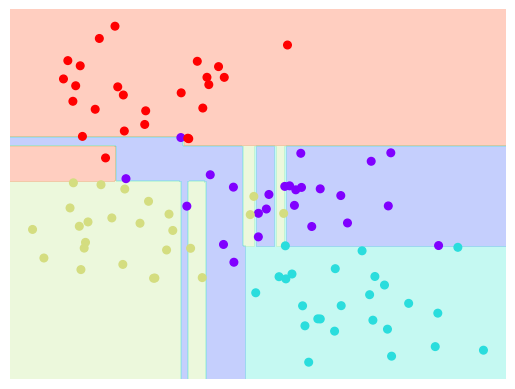

In [25]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Обратите внимание, что по мере возрастания глубины мы получаем области классификации очень странной формы. Например, между желтой 
и синей областями появляется узкая и вытянутая в высоту фиолетовая область. 
Это результат того, что дерево принятия решений переобучено.

Подобное переобучение присуще всем деревьям принятия решений.


Ансамбли оценивателей: случайные леса

Случайные леса — пример одного из методов ансамблей (ensemble), основанных на агрегировании результатов ансамбля более простых оценивателей. 
Идея комбинации нескольких переобученных оценивателей для снижения эффекта этого переобучения лежит в основе метода ансамблей под названием «баггинг» (bagging). 

Баггинг использует ансамбль параллельно работающих переобучаемых оценивателей и усредняет результаты для получения оптимальной классификации. Ансамбль случайных деревьев принятия решений называется случайным лесом (random forest).

Выполнить подобную баггинг-классификацию можно вручную с помощью метода оценивателя BaggingClassifier из библиотеки Scikit-Learn

C:\Users\Acer\AppData\Local\Temp\ipykernel_16896\888846089.py:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


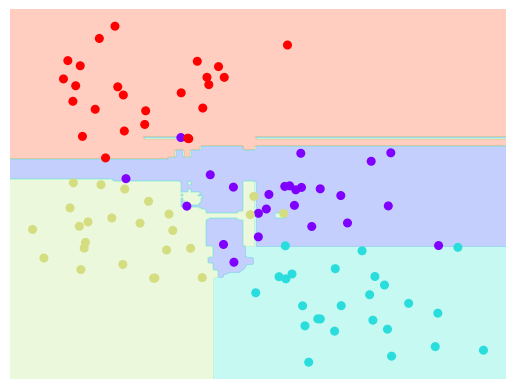

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

На практике для рандомизации деревьев принятия решений обеспечивается определенная стохастичность процесса выбора разбиений.
При этом в обучении участвуют все данные, но результаты обучения все равно сохраняют требуемую случайность.
В библиотеке Scikit-Learn подобный оптимизированный ансамбль случайных деревьев принятия решений, автоматически выполняющий всю рандомизацию, реализован в оценивателе RandomForestClassifier. 
Все, что остается сделать, — выбрать количество оценивателей и он очень быстро (при необходимости параллельно) обучит ансамбль деревьев. 
Подробнее о настройках параметров https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

C:\Users\Acer\AppData\Local\Temp\ipykernel_16896\888846089.py:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


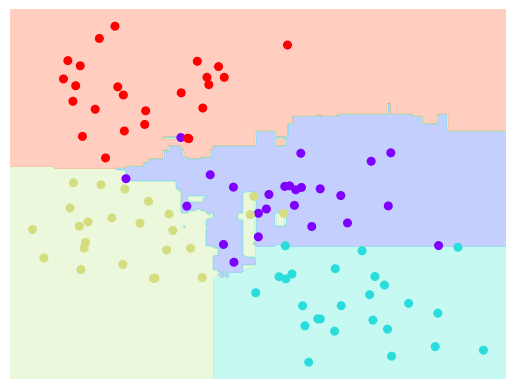

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

## Задание 2. 
На наборе данных Boston Housing https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset сравнить работу алгоритмов линейной регрессии, гребневой регрессии (L2 -регуляризации), лассо-регрессии (L1 регуляризации )

In [46]:
#Загрузка данных
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Разделение данных
X = data.drop('AGE', axis=1)  # Предполагается, что 'AGE' - целевая переменная
y = data['AGE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  # Попробуйте разные значения alpha
lasso_reg = Lasso(alpha=1.0)  # Попробуйте разные значения alpha

linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Оценка результатов
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("MSE Linear Regression:", mse_linear)
print("MSE Ridge Regression:", mse_ridge)
print("MSE Lasso Regression:", mse_lasso)


MSE Linear Regression: 243.2291655951603
MSE Ridge Regression: 253.41392335062469
MSE Lasso Regression: 275.7488161823435


## Задание 3.
 Используя небор данных Breast Cancer Wisconsin (Diagnostic) Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data  сравнить работу алгоритмов k-средних, DBSCAN и агломеративной кластеризации

In [49]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from pandas import read_csv
data = read_csv('cancer.csv', header=None, names=column_names)
print(data.head())

                                                                                                                                                                                                                                                                                CRIM  \
id       diagnosis radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se  concave points_se   
842302   M         17.99       10.38        122.8          1001      0.1184          0.2776           0.3001         0.1471              0.2419        0.07871                1.095     0.9053     8.589        153.4   0.006399      0.04904        0.05373                 0.01587   
842517   M         20.57       17.77        132.9          1326      0.08474         0.07864          0.0869         0.07017             0.1812        0.05667  

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


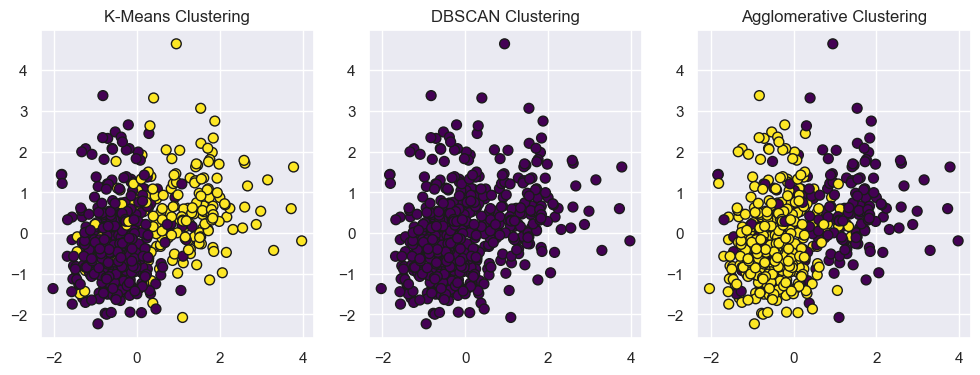

In [55]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Загрузка данных
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Определение кластеров с использованием k-средних
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Определение кластеров с использованием DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Определение кластеров с использованием агломеративной кластеризации
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_cluster.fit_predict(X_scaled)

# Визуализация результатов
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('K-Means Clustering')

plt.subplot(132)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('DBSCAN Clustering')

plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Agglomerative Clustering')

plt.show()
